# Project_IMDb
A pipeline to run whole codes of our project from data exploration, feature preprocessing to movie network construction and prediction.

In [1]:
# Import package
import numpy as np
from Lib_graph import construct_graphs
from Lib_gradientdecent import Optimize_GraphWeight
from Lib_vis import visual_list, visual_signalongraph

## PART 1. Generate subgraphs

In [2]:
# 1.setting file path and choosing features
File_path = r'./data'
features  = ['budget',
             'cast',
             'crew',
             'genres',    # but genre is not used to build a subgraph up to now
             'keywords',
             'popularity',
             'production_companies',
             'vote_average']

# 2.constructing subgraphs
signal, W_3d = construct_graphs( File_path, features, genre = 'Romance')

********Construction Phase for graphs********
Generating ROI(Return on Investment ) signal ...
Generating subgraphs according to the given features ...
---> The previously generated weight matrix of budget has been loaded.
---> The previously generated weight matrix of actor/actress has been loaded.
---> The previously generated weight matrix of directors has been loaded.
Since we separate the whole in different genres, we won't use genre as a feature
---> The previously generated weight matrix of keywords has been loaded.
---> The previously generated weight matrix of popularity has been loaded.
---> The previously generated weight matrix of companies has been loaded.
---> The previously generated weight matrix of votes has been loaded.
Generating genre specified signal and weight ...


## PART 2. Optimize weight vector V 

In [3]:
# 1.initialize GD parameters
maxiters        = 1000
step_Vk         = 0.2
step_t          = 0.00000005
Lambda          = 0.01     # L1 regularization lambda = 0.01
gain            = 5

algo_reg        = 'L2'
algo_grad       = 'matrix'
adaptive_step   = True

# 2.initialize kernel parameters
# It would be more convincing that weights of these subgraphs start from the same 
# start point (1/number of graphs). In addition, our objective funtion is nonconvex 
# to Vk. Thus if Vk is randomly initialized, it tends to converge to different local minima.
t               = 0.001
Vk              = 1/( len(features) - 1 ) * np.ones( len(features) - 1 )  # genre is not used to build a subgraph up to now

# 3.iteratively optimize Vk
t_list, Vk_list, loss_list, final_weight = Optimize_GraphWeight( W_3d,      Vk,       signal, t,       gain,   maxiters,
                                                                 algo_grad, algo_reg, Lambda, step_Vk, step_t, adaptive_step)


********Optimization Phase for weights********
Now we have finished 0.00% of the task
Now we have finished 5.00% of the task
Now we have finished 10.00% of the task
Now we have finished 15.00% of the task
Now we have finished 20.00% of the task
Now we have finished 25.00% of the task
Now we have finished 30.00% of the task
Now we have finished 35.00% of the task
Now we have finished 40.00% of the task
Now we have finished 45.00% of the task
Now we have finished 50.00% of the task
Now we have finished 60.00% of the task
Now we have finished 65.00% of the task
Now we have finished 70.00% of the task
Now we have finished 75.00% of the task
Now we have finished 80.00% of the task
Now we have finished 85.00% of the task
Now we have finished 90.00% of the task
Now we have finished 95.00% of the task


## PART 3. Visualize the results

The smoothness of the given graph is 3690554.45
The smoothness of the given graph is 4226341.64


0

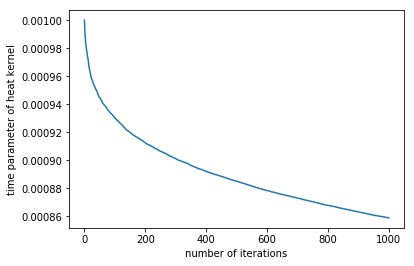

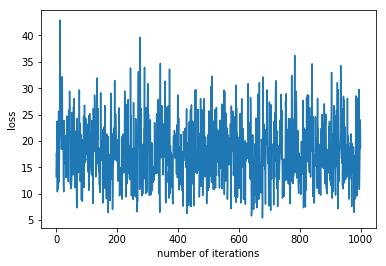

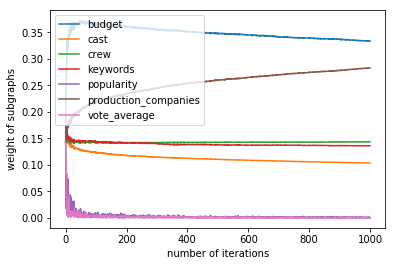

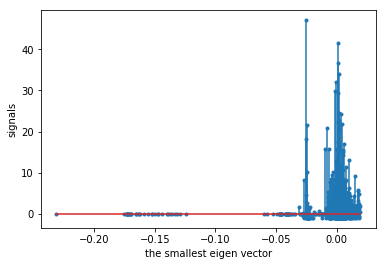

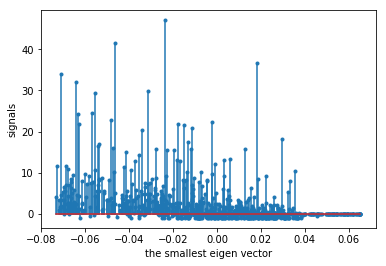

In [4]:
# 1.visualze the process of optimization 
legend = features.copy()
legend.remove('genres')
visual_list( loss_list, t_list, Vk_list, Vk_name = legend, save = True)

# 2.visualize the signal on the final graph 
visual_signalongraph(final_weight, signal, labels = np.ones(final_weight.shape[0]), save = True)

# 3.visualize the signal on the original graph
Weight = np.zeros(W_3d.shape[0:2])
for ct in range( len(Vk) ):
    Weight += W_3d[:,:,ct] * Vk[ct]
visual_signalongraph(Weight, signal, labels = np.ones(Weight.shape[0]), save = True)

## PART 4. Predict the ROI of a given new node 

In [5]:
# 1. define a new node with its 
# La La Land
new_movie = {'budget':      30000000, 
             'cast':        ['Ryan Gosling', 'Emma Stone', 'Amiée Conn', 'Terry Walters', 'Thom Shelton'], 
             'crew':        'Damien Chazelle', 
             'genres':      446092357, 
             'keywords':    ['los angeles california', 'pianist', 'aspiring actress', 'musician', 'jazz club'], 
             'popularity':  284, 
             'production_companies':['Summit Entertainment', 'Black Label Media', 'TIK Films', 'Impostor Pictures', 'Gilbert Films', 'Marc Platt Productions'], 
             'vote_average':8.0}